## Load Data from CSVs

## Fixing Data Types

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('/media/gomes/pessoal/GitHub/cursos_treinamentos_data_science/Maratona Data Science Brazil/Semana#02 - Analise de Dados/Introducao a Analise de Dados/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]


{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [4]:
#####################################
## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
#####################################
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments_filename = '/media/gomes/pessoal/GitHub/cursos_treinamentos_data_science/Maratona Data Science Brazil/Semana#02 - Analise de Dados/Introducao a Analise de Dados/enrollments.csv'
engagement_filename = '/media/gomes/pessoal/GitHub/cursos_treinamentos_data_science/Maratona Data Science Brazil/Semana#02 - Analise de Dados/Introducao a Analise de Dados/daily_engagement.csv'
submissions_filename = '/media/gomes/pessoal/GitHub/cursos_treinamentos_data_science/Maratona Data Science Brazil/Semana#02 - Analise de Dados/Introducao a Analise de Dados/project_submissions.csv'

enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])


{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

daily_engagement[0]


{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        if 'acct' in data_point:
            unique_students.add(data_point['acct'])
        else:
            unique_students.add(data_point['account_key'])
    return unique_students

lista_enrollment = set()
lista_daily_engagement = set()
lista_project_submissions = set()

for enrollment in enrollments:
    lista_enrollment.add(enrollment['account_key']) 

for engagement in daily_engagement:
    if 'acct' in engagement:
        lista_daily_engagement.add(engagement['acct'])
    else:
        lista_daily_engagement.add(engagement['account_key'])
        
for submission in project_submissions:
    lista_project_submissions.add(submission['account_key']) 
    
total_enrollments = len(enrollments)
enrollments_unique = len(lista_enrollment)

total_daily_engagement = len(daily_engagement)
engagements_unique = len(lista_daily_engagement)

total_project_submissions = len(project_submissions)
submissions_unique = len(lista_project_submissions)

print('total_enrollments: {}' . format(total_enrollments))
print('enrollments_unique: {}' . format(enrollments_unique))

print('total_daily_engagement: {}' . format(total_daily_engagement))
print('engagements_unique: {}' . format(engagements_unique))

print('total_project_submissions: {}' . format(total_project_submissions))
print('submissions_unique: {}' . format(submissions_unique))

print('##############################################')

total_enrollments = len(enrollments)
enrollments_unique = len(get_unique_students(enrollments))

total_daily_engagement = len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
engagements_unique = len(get_unique_students(daily_engagement))

total_project_submissions = len(project_submissions)
submissions_unique = len(get_unique_students(project_submissions))

print('total_enrollments: {}'.format(total_enrollments))
print('enrollments_unique: {}'.format(enrollments_unique))

print('total_daily_engagement: {}'.format(total_daily_engagement))
print('engagements_unique: {}'.format(engagements_unique))

print('total_project_submissions: {}'.format(total_project_submissions))
print('submissions_unique: {}'.format(submissions_unique))

total_enrollments: 1640
enrollments_unique: 1302
total_daily_engagement: 136240
engagements_unique: 1237
total_project_submissions: 3642
submissions_unique: 743
##############################################


total_enrollments: 1640
enrollments_unique: 1302
total_daily_engagement: 136240
engagements_unique: 1237
total_project_submissions: 3642
submissions_unique: 743


## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

# Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    if 'acct' in engagement_record:
        engagement_record['account_key'] = engagement_record['acct']
        del[engagement_record['acct']]
    
daily_engagement[0]['account_key']

u'0'

## Missing Engagement Records

In [10]:
#####################################
#                 4                 #
#####################################
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break
    


## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
print 'udacity_test_accounts:', len(udacity_test_accounts)        


udacity_test_accounts: 6


In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print 'non_udacity_enrollments:', len(non_udacity_enrollments)
print 'non_udacity_engagement:', len(non_udacity_engagement)
print 'non_udacity_submissions:', len(non_udacity_submissions)

non_udacity_enrollments: 1622
non_udacity_engagement: 135656
non_udacity_submissions: 3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7


In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students: 
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += float(engagement_record['total_minutes_visited'])
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

## Lessons Completed in First Week

In [22]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
from collections import defaultdict
import numpy as np

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')   
describe_data(total_minutes_by_account.values())

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997
Mean: 1.636180904522613
Standard deviation: 3.0025612998294227
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [23]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

## Splitting out Passing Students

In [24]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
(rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [25]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7
passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


## Making Histograms

Populating the interactive namespace from numpy and matplotlib
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


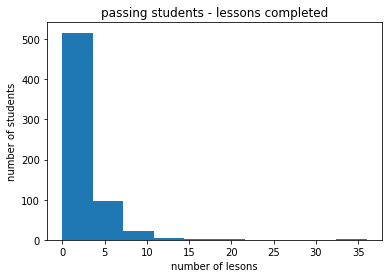

In [54]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data, title, xlabel, ylabel):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.hist(data, bins=10)
    
#describe_data(non_passing_minutes.values(), 'non-passing students - minutes spent', 'number of minutes', 'number of students')
#describe_data(passing_minutes.values(), 'passing students - minutes spent', 'number of minutes', 'number of students')
#describe_data(non_passing_lessons.values(), 'non-passing students - lessons completed', 'number of lessons', 'number of students')
describe_data(passing_lessons.values(), 'passing students - lessons completed', 'number of lesons', 'number of students')
#describe_data(non_passing_visits.values(), 'non-passing students - days visited', 'number of days', 'number of students')
#describe_data(passing_visits.values(), 'passing students - days visited', 'number of days', 'number of students')

## Improving Plots and Sharing Findings

Populating the interactive namespace from numpy and matplotlib


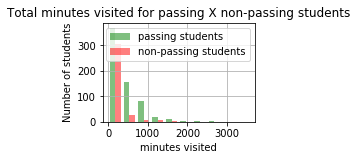

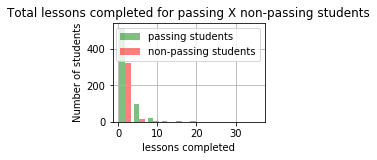

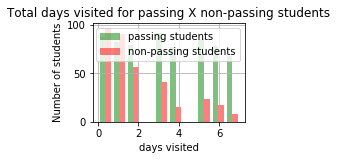

In [107]:
######################################
#                 14                 #
######################################
## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

%pylab inline

def histplot(data1, data2, i, xlabel, title):
    fig = plt.figure()
    i = fig.add_subplot(2, 2, i)
    i.hist([data1, data2], bins = 10, color = ['g', 'r'], alpha = 0.5, label = ['passing students', 'non-passing students'])
    plt.xlabel(xlabel)
    plt.ylabel('Number of students')
    plt.title(title)
    plt.legend()
    plt.grid()

data1 = passing_minutes.values()
data2 = non_passing_minutes.values()
data3 = passing_lessons.values()
data4 = non_passing_lessons.values()
data5 = passing_visits.values()
data6 = non_passing_visits.values()

histplot(data1, data2, 1, 'minutes visited', 'Total minutes visited for passing X non-passing students')
histplot(data3, data4, 2, 'lessons completed', 'Total lessons completed for passing X non-passing students')
histplot(data5, data6, 3, 'days visited', 'Total days visited for passing X non-passing students')

# import seaborn as sns

# %pylab inline

# plt.hist(passing_visits.values(), bins=8)
# plt.xlabel('Number of days')
# plt.title('Subway Project - Days visited in the first week - Passing students')